In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
# Load Dataset
df = pd.read_csv("/content/TASK-ML-INTERN.csv")

In [21]:
# Data Exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  

In [22]:
# Identify Missing Values
missing_values = df.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


Columns has no missing values

In [23]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [24]:
x=df.iloc[:,1:449]

In [25]:
y=df.iloc[:,-1]

In [26]:
x

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.671400,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.728588,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.741594,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.642285,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.784919,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.748725,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383


Test for normality of each column to opt for suitable outlier detection method

In [27]:
from scipy.stats import shapiro, normaltest, skew

# Normality Tests (Shapiro-Wilk and D'Agostino's K-squared)
def check_normality(data):
    p_value_shapiro = shapiro(data)[1]
    p_value_dagostino = normaltest(data)[1]

    if p_value_shapiro > 0.05 and p_value_dagostino > 0.05:
        return "Normally Distributed"
    else:
        return "Skewed Distribution"

# Apply Test to Each Column
distribution_results = {col: check_normality(x[col]) for col in x.columns if x[col].dtype != 'object'}

# Summary of Results
normal_columns = [col for col, result in distribution_results.items() if result == "Normally Distributed"]
skewed_columns = [col for col, result in distribution_results.items() if result == "Skewed Distribution"]

print(f"Number of Normally Distributed Columns: {len(normal_columns)}")
print(f"Number of Skewed Columns: {len(skewed_columns)}")

# Optional: Display Results
print("\nNormally Distributed Columns:")
print(normal_columns)

print("\nSkewed Columns:")
print(skewed_columns)


Number of Normally Distributed Columns: 60
Number of Skewed Columns: 388

Normally Distributed Columns:
['26', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86']

Skewed Columns:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '27', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', 

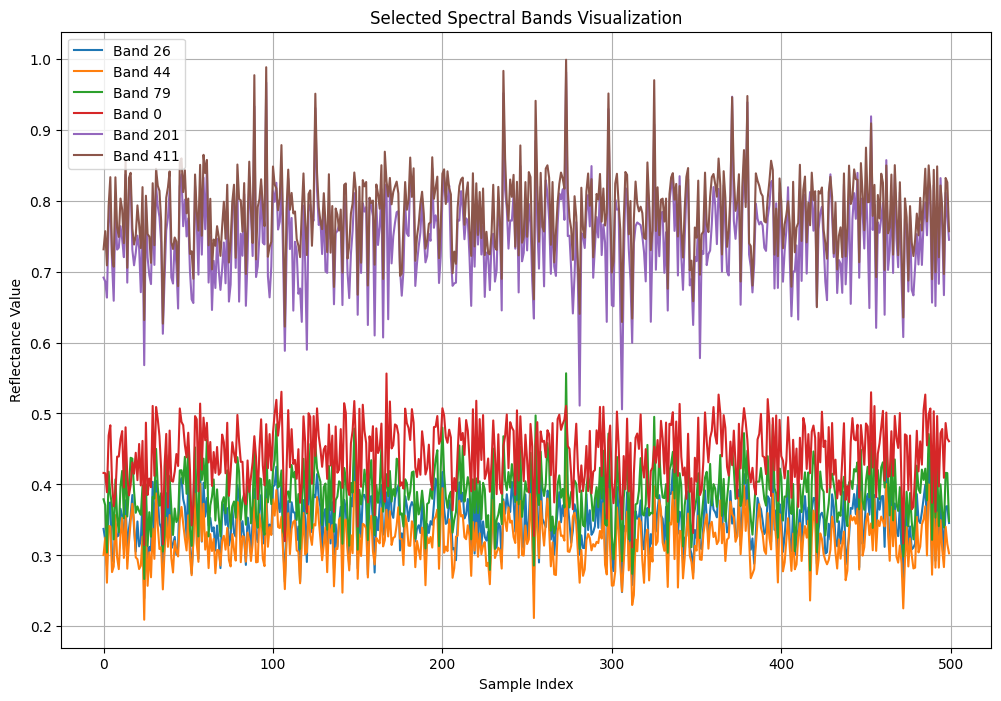

In [28]:
# Visualizing Selected Spectral Bands
selected_columns = ['26', '44', '79', '0', '201', '411']
plt.figure(figsize=(12, 8))
for col in selected_columns:
    plt.plot(df[col], label=f'Band {col}')
plt.title("Selected Spectral Bands Visualization")
plt.xlabel("Sample Index")
plt.ylabel("Reflectance Value")
plt.legend()
plt.grid(True)
plt.show()

QQ  plot for some columns to verify above test result

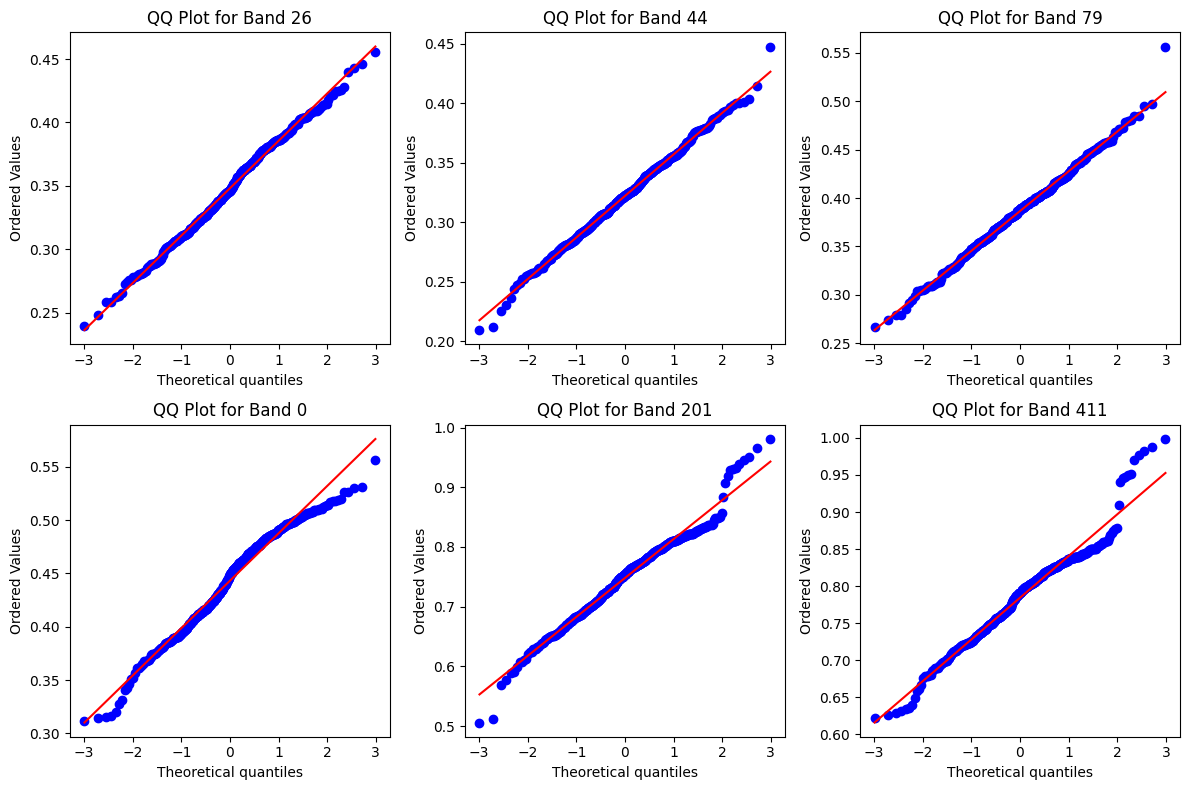

In [29]:
# QQ Plot for Selected Columns
selected_columns = ['26', '44', '79', '0', '201', '411']
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    stats.probplot(x[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for Band {col}')
plt.tight_layout()
plt.show()

Since most of the columns are not normal, therefore i use IQR technique here

In [30]:
# Outlier Detection using IQR
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

# Outlier Mask
outlier_mask = (x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))

# Count of Outliers in Each Column
outliers_count = outlier_mask.sum()
print("Outlier Count per Column:")
print(outliers_count[outliers_count > 0])


Outlier Count per Column:
15      2
17      2
19      2
20      1
21      1
       ..
443     9
444    11
445    11
446    10
447    13
Length: 428, dtype: int64


Cap the outlier

In [31]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

x1 = x.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [32]:
x1.describe()

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.742094,0.740964,0.740391,0.740172,0.739348,0.739500,0.738443,0.737975,0.737376,0.737748
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.052547,0.052238,0.052109,0.052276,0.052060,0.052094,0.052127,0.052918,0.053371,0.052782
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.594633,0.588437,0.594937,0.591866,0.590085,0.590677,0.588066,0.583205,0.583314,0.587717
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.706387,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.744503,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.780890,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.892644,0.891552,0.884974,0.888191,0.885563,0.886711,0.888258,0.891071,0.889428,0.886267


In [33]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(x1)
y = y

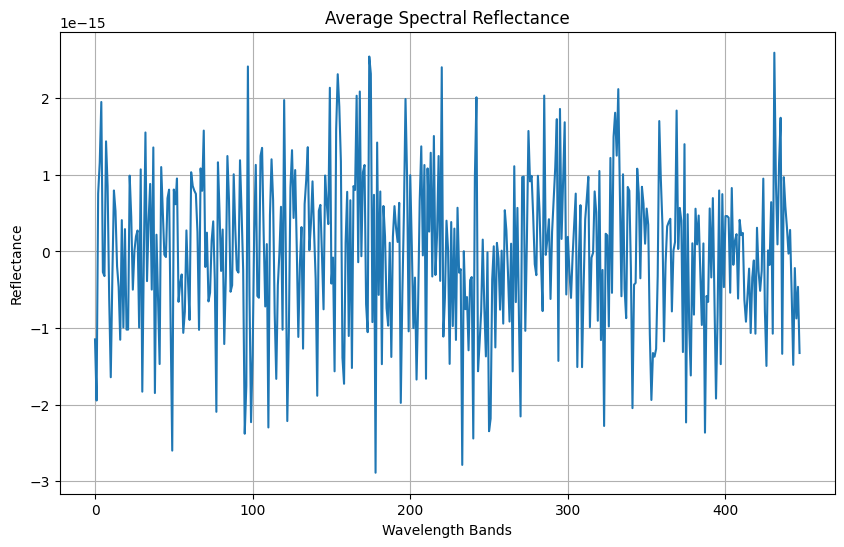

In [34]:
# Visualizing Spectral Data
plt.figure(figsize=(10, 6))
plt.plot(np.mean(X, axis=0))
plt.title("Average Spectral Reflectance")
plt.xlabel("Wavelength Bands")
plt.ylabel("Reflectance")
plt.grid(True)
plt.show()

In [35]:
X.shape

(500, 448)

In [36]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X)

In [37]:
pca.explained_variance_ratio_

array([0.87096925, 0.05812461, 0.02072832, 0.01093804])

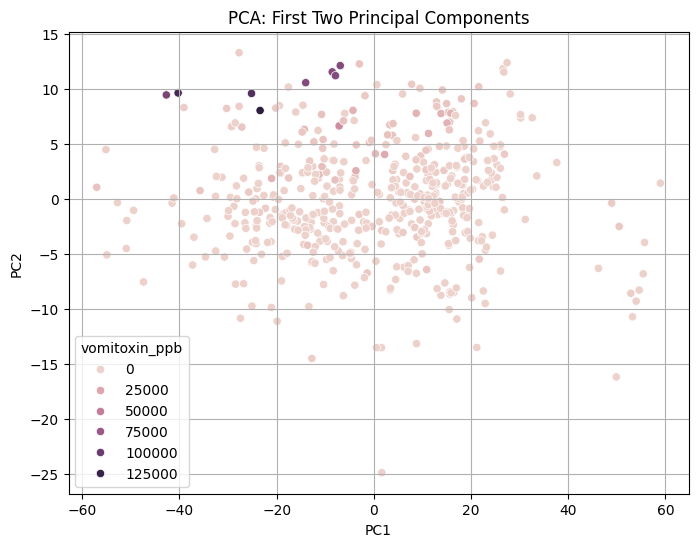

In [38]:
# Visualizing PCA Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA: First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [39]:
print(f"Number of Components After PCA: {X_pca.shape[1]}")

Number of Components After PCA: 4


In [40]:
X_pca

array([[-14.77258148,   2.34254264,   1.91988117,  -2.24911151],
       [-14.67725557,   2.41767093,   0.75655437,  -0.90297139],
       [-30.74498036,  -5.2599791 ,  -4.91231179,   1.46519569],
       ...,
       [ 19.17387611,  -1.67742942,   1.47246295,   2.6695657 ],
       [  8.43622608,   1.12801674,   1.50109907,   2.52263799],
       [ -4.93779037,  -4.90205881,  -0.55666663,   3.1482399 ]])

In [41]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio per Component: {explained_variance_ratio}")
print(f"Total Explained Variance: {explained_variance_ratio.sum():.2f}")

Explained Variance Ratio per Component: [0.87096925 0.05812461 0.02072832 0.01093804]
Total Explained Variance: 0.96


Model fitting

In [42]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [43]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [44]:
# Model Evaluation
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

MAE: 4974.8795
RMSE: 11937.3904
R² Score: 0.4902


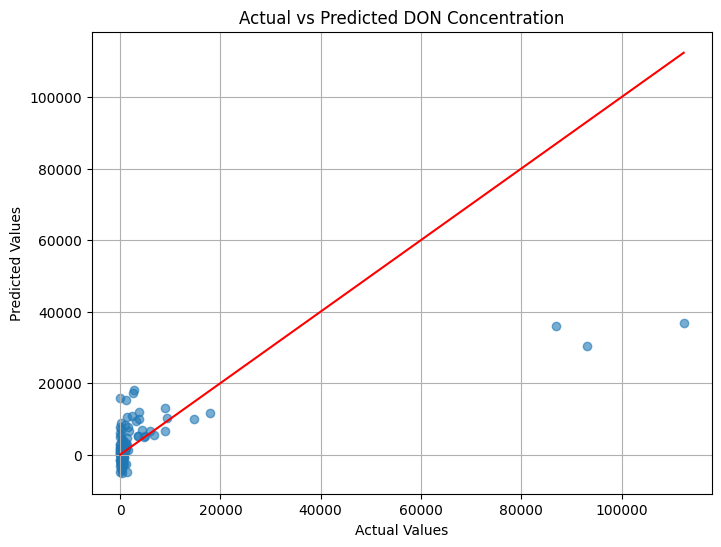

In [45]:
# Scatter Plot for Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title("Actual vs Predicted DON Concentration")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

In [46]:
# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [47]:
# Model Evaluation
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

MAE: 2412.1256
RMSE: 6853.0178
R² Score: 0.8320


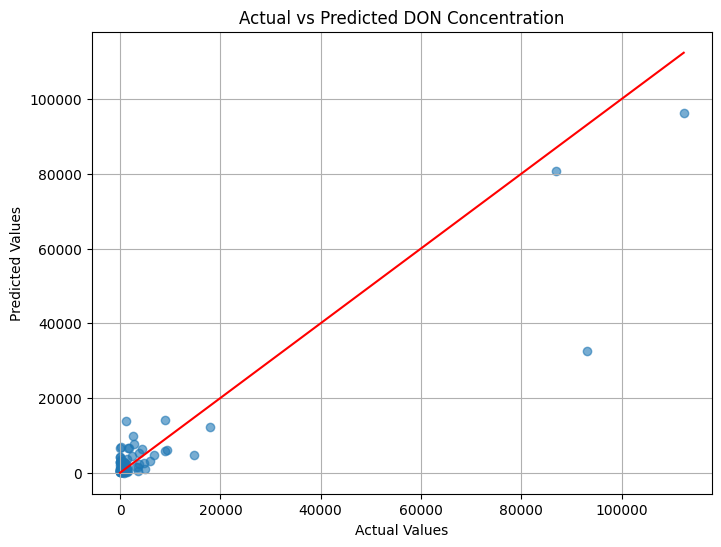

In [48]:
# Scatter Plot for Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title("Actual vs Predicted DON Concentration")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

In [49]:
# Grid Search for Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Model Evaluation
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


MAE: 2412.1256
RMSE: 6853.0178
R² Score: 0.8320
